In [1]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [2]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-21 21:31:03.495673: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-21 21:31:03.500030: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-21 21:31:03.590076: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-21 21:31:03.593225: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimize

In [3]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [4]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
960632,1850891648,Frankenstein (Isis Large Print Fiction),NaN,ARBEQ9R5IOIYZ,"J. Rathbun ""jay""",0/0,5.0,1303430400,one of the most important books to read,this novel forces the reader to consider how k...
278450,B000PGLOMM,Ulysses.,NaN,ACSTT0LT2SYR5,Jason Cigan,27/30,5.0,1167523200,"It's great, but take all necessary precautions","ULYSSES is one of the most widely discussed, d..."
646260,B000NDQMH4,"Whistling Season, a Novel",NaN,A2I3TKKHF6INI6,Teddy Bird,4/4,5.0,1184198400,Just a really lovely little book.,I won't go into the details of plot or charact...
49456,0753113880,The Other Boleyn Girl,NaN,A22V7II9B5S05Q,"a reader ""lgoose""",3/6,2.0,1144108800,not very interesting,This book reads like a romance novel and doesn...
2064479,0451521196,Wuthering Heights (Signet classics),NaN,A3VOJCT1HHOBLR,"Loretto M. Leary ""Celticwoman""",0/0,4.0,1349481600,Emotional roller coaster ride,If there is a list of one hit wonders in liter...
630062,0292705743,Long Dark Road: Bill King and Murder in Jasper...,NaN,A24H4VQI4Z1SQG,R. M. Meadows,0/0,3.0,1265155200,A Disappointment,I enjoyed the first 200 pages of this book - t...
1976986,B000NGP1NW,Queen of the Damned (Book 3 of Vampire Chronic...,NaN,ARQA1L7YPZSQU,"""mookiekaos""",2/4,5.0,1016150400,Is Anne Rice the best or what?,Anne Rice is my favorite author. I wish I coul...
2120961,0879308060,Guitar Effects Pedals the Practical Handbook B...,16.49,A3AR0KYT8ZARHI,Jim Walls,35/37,5.0,1099353600,Pedal Power,Musician-turned-journalist Dave Hunter describ...
1320531,B000JSHCCW,"A Feast for Crows (A Song of Ice and Fire, Boo...",NaN,A1WSVBZ598OK29,Lord Buehler,7/11,5.0,1162252800,Better than reviews suggest.,I was hooked on this series after book 1 and w...
1650796,B000COCIO0,John Glenn: A Memoir,NaN,A3VHF9E80MW4QN,"BlueDiamond66 ""DiamondGirl66""",0/0,5.0,1257724800,Interesting and Informative,I found John Glenn's book to be interesting on...


In [5]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [6]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
193844,Chords & Scales for Guitar (Fast Track Music I...,Guitar Chords for Beginners contains 65 differ...,"['Gareth Evans', 'Late Wilde Reader in Mental ...",http://books.google.com/books/content?id=TiVBn...,http://books.google.com/books?id=TiVBngEACAAJ&...,NaN,2014,http://books.google.com/books?id=TiVBngEACAAJ&...,['Guitar'],NaN
102834,Beautiful Shadow,Patricia Highsmith author of Strangers on a Tr...,['Andrew Wilson'],http://books.google.com/books/content?id=8As0E...,http://books.google.com/books?id=8As0EAAAQBAJ&...,Bloomsbury Paperbacks,2010,http://books.google.com/books?id=8As0EAAAQBAJ&...,['Biography & Autobiography'],1.0
13146,Delirious New York,"Since its original publication in 1978, Deliri...",['Rem Koolhaas'],http://books.google.com/books/content?id=163oA...,http://books.google.nl/books?id=163oAwAAQBAJ&p...,"The Monacelli Press, LLC",2014-07-01,https://play.google.com/store/books/details?id...,['Architecture'],NaN
141060,Beacons in the Night: With the OSS and Tito's ...,NaN,['Franklin Lindsay'],NaN,http://books.google.com/books?id=qxuVpwAACAAJ&...,NaN,1933,http://books.google.com/books?id=qxuVpwAACAAJ&...,NaN,NaN
97545,John Dewey: The United States (1859-1952),John Dewey's Democracy and Education addresses...,['John Dewey'],http://books.google.com/books/content?id=jqROA...,http://books.google.com/books?id=jqROAAAAMAAJ&...,NaN,1916,https://play.google.com/store/books/details?id...,['Democracy'],NaN
156666,Tales of a Sea Gypsy,"For many years, Ray Jason has been delighting ...",['Ray Jason'],http://books.google.com/books/content?id=ezMNA...,http://books.google.com/books?id=ezMNAAAACAAJ&...,Paradise Cay Publications,2010-01-01,http://books.google.com/books?id=ezMNAAAACAAJ&...,['Humor'],NaN
165317,Moments Together for Parents: For Drawing Near...,This book is one in a set of small gift hard c...,"['Dennis Rainey', 'Barbara Rainey']",http://books.google.com/books/content?id=4Y8Fe...,http://books.google.com/books?id=4Y8FeHORB74C&...,Gospel Light Publications,2003-03-17,http://books.google.com/books?id=4Y8FeHORB74C&...,['Religion'],1.0
171669,Philosophical Essays and Correspondence (Desca...,A superb text for teaching the philosophy of D...,['René Descartes'],http://books.google.com/books/content?id=XspgD...,http://books.google.com/books?id=XspgDwAAQBAJ&...,Hackett Publishing,2000-03-15,https://play.google.com/store/books/details?id...,['Philosophy'],NaN
47400,The River of the Mother of God and Other Essay...,His name is inextricably linked with a single ...,['Aldo Leopold'],http://books.google.com/books/content?id=g4-7d...,http://books.google.com/books?id=g4-7dkFJL7AC&...,Univ of Wisconsin Press,1992-12-01,https://play.google.com/store/books/details?id...,['Nature'],NaN
80764,"Finally, Love (Heartsong Presents #222)",NaN,['Jill Stengl'],http://books.google.com/books/content?id=zI4lv...,http://books.google.com/books?id=zI4lvXoisOwC&...,NaN,1997,http://books.google.com/books?id=zI4lvXoisOwC&...,['Christian fiction'],NaN


In [7]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [8]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [9]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: User_id provides same information.
#   - Id: Innecesary column.
#   - review/helpfulness: Unncesary column for current analysis
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title 
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName','Price','review/helpfulness','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [10]:
df_rating_processed.sample(10)

,Title,User_id,review/score,review/time,review/text
1793156,"Economics in one lesson,",A3W1J0KZJJPG5J,5.0,1355184000,Teacher no longer at school - no review to sha...
925609,One Flew Over the Cuckoo's Nest,A1LVZOK9F7K4CN,4.0,1087603200,The novel is told in the first-person from the...
1736829,The Street Lawyer,ANR9G6C4ARDZ1,5.0,1316995200,I loved this book! It was fast-paced and inter...
1530762,The New Optimum Nutrition Bible,A3QXLUXJI635F9,5.0,1274745600,"This book is a large book of ""awesome"". The in..."
853065,The Hobbit,A24RBTGYT70HHL,4.0,1308873600,The Hobbit is different from Lord of the Rings...
1485799,Twice Burned (Mira Romantic Suspense),AFVQZQ8PW0L,4.0,1026000000,"The Stonybrook, Pennsylvania police arrest Ted..."
1602645,Who Moved My Cheese? An-Amazing Way to Deal wi...,A2VF3BXFXXTEPL,1.0,1032048000,This book was given to me as a gift. It costs ...
2288323,The Tracker,A2P47U05EGLHGA,5.0,994550400,So incredibly true. So real. I was not one cha...
2214545,"George Washington, (American statesmen)",A38QH05UH58Y04,5.0,1342137600,"Written in 1922, this biography shows a lot of..."
2046825,The black camel,A1L43KWWR05PCS,5.0,1135641600,"Silver screen goddess, Sheila Fane, has a secr..."


In [11]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title', 
                                                        'User_id':'user_id',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/summary': 'summary',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [12]:
df_rating_processed.isna().sum()

title             208
user_id        561787
review              0
review_time         0
text                8
dtype: int64

In [13]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [14]:
#CLEAN THE DATASETS

In [15]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['title', 'text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [16]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
205660,Translator Self-Training--Russian: A Practical...,['Morry Sofer'],Taylor Trade Publications,2011-12-01,['Language Arts & Disciplines']
43,Beginner's Yoruba (Hippocrene Beginner's Series),['Kayode J. Fakinlede'],Hippocrene Books,2005,['Foreign Language Study']
132876,The Marblehead Lighthouse: Lake Erie's eternal...,['Betty Neidecker'],Hawks Cry Publications,1996-10-01,['Lighthouses']
104318,Perennial Plants for Profit or Pleasure: How t...,['Francis X. Jozwik'],High Sierra Books,2000,['Gardening']
169255,Who Killed the Robins Family?,"['Thomas Chastain', 'Bill Adler']",William Morrow & Company,1983,['Fiction']


In [17]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [18]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [19]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [20]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
156638,Houghton Mifflin Invitations to Literature: Li...,['Eric Schlosser'],Houghton Mifflin Harcourt,['Business & Economics'],2012
122952,Parachuting: The Art of Freefall Relative Work,"['Madden Travis Works', 'Pat Works']",NaN,['Parachuting'],1978
189343,The Dore' Lectures (Edinburgh Lecture Series),['Thomas Troward'],NaN,['New Thought'],1918
141604,Special Interest: A Novel (Angela Bivens Myste...,['Chris Benson'],NaN,['Fiction'],2001
10112,C++ for Dummies: Quick Reference (For Dummies),['Dan Gookin'],John Wiley & Sons,['Computers'],2004
69132,Growing Fruit in the Upper Midwest,['Don Gordon'],U of Minnesota Press,['Gardening'],1997
60788,The Bora-Bora Dress,['Carole Lexa Schaefer'],Candlewick Press,['Juvenile Fiction'],2005
53931,The Concise Guide to Becoming an Independent C...,['Herman Holtz'],Wiley,['Business & Economics'],1999
160751,Mostly Married (Zebra Historical Romance),['Madeleine Conway'],Kensington Publishing Corp.,['Fiction'],2004
14902,Open Season,['Linda Howard'],Simon and Schuster,['Fiction'],2011


In [21]:
#Updating the Authors to a list.
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: [author for author in str(x).split(",")] if pd.notna(x) else None)

In [22]:
#Updating Categories to list
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: [category for category in str(x).split(",")] if pd.notna(x) else None)

In [23]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [24]:
df_rating_processed.sample(5)

,title,user_id,review,review_time,text
1929839,Hinds' Feet on High Places,NaN,5.0,915062400,Encouragement and Direction are only two of th...
2116714,Sister Carrie,NaN,4.0,923356800,This is an amazingly rich book. It explores it...
2986183,Spanish in 10 Minutes a Day (Sunset Series),APB7E23Y04MUB,2.0,1046304000,I have passed this book up numerous times at t...
2309873,Evensong,A3OVDFJ81JEWEG,2.0,964137600,"I kept plodding away at this book, but for som..."
430015,Little Men: Life at Plumfield With Jo's Boy,A3TKGMYU3LFIP3,5.0,1341360000,This book should be required reading for every...


In [25]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [26]:
df_rating_processed.sample(10)

,title,user_id,review,text,review_year
2517447,Zen and the Art of Motorcycle Maintenance : An...,A2DPV6IKXJ46O,3.0,probably the most over-hyped book of all time....,2010
145091,Keeping Faith,A2IGTKB44LFKUP,5.0,Jodi Picoult is an amazing author who gives gr...,2012
1691564,The Beanstalk and Beyond: Developing Critical ...,NaN,5.0,"After taking a class with Joan Wolf, I decided...",2001
739033,"The time machine,: An invention,",A2K4RNOAD5J3WB,5.0,This is one one those works that prove the val...,2001
1340047,Pride and Prejudice,A2BEESUQ668WCR,4.0,Great text but the reader struggles with male ...,2007
2878471,Clock of the Long Now: The Ideas Behind the Wo...,AHD101501WCN1,5.0,Steward Brand is a person who thinks 'big'. Hi...,2006
195666,The Giver,NaN,5.0,The Giver is my all time favorite book. I read...,1999
362981,The Politician,NaN,4.0,This book was considered one of the most contr...,1997
2927516,Resurrection of the Son of God (Christian Orig...,A1IHB0LND73UY4,5.0,This book is not only about the Resurrection o...,2003
1103174,Nine Princes in Amber,NaN,5.0,The Amber series is probably the best science ...,1997


In [27]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   user_id         object 
 2   review          float64
 3   text            object 
 4   review_year     int64  
 5   authors         object 
 6   publisher       object 
 7   categories      object 
 8   published_year  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 183.1+ MB


In [28]:
df_all_data_processed.sample(10)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year
446229,The Last of the Mohicans,A1VFKMHY42W2O3,3.0,Cooper's Prose at times seems designed to hide...,2000,[James Fenimore Cooper],Pegasus Books,[Fiction],2018
1619292,The Curse of the Raven Mocker,NaN,5.0,Mary Youmans has created a beautiful fantasy w...,2004,[Marly Youmans],Puffin,[Juvenile Fiction],2006
2599964,Hiking Wisconsin (America's Best Day Hiking),A98A5ZZT4X5BY,4.0,Hiking Wisconsin was my first encounter with t...,2004,[Martin Hintz],NaN,[Hiking],1997
1834492,Inside the Asylum: Why the UN and Old Europe a...,NaN,5.0,If you don't read another book this year ... y...,2004,[Jed L. Babbin],Regnery Publishing,[Political Science],2004
527136,Pride and Prejudice,A8Z3GNRR5SWRR,5.0,I love Pride and Prejudice. I love Jane Austen...,2013,[Jane Austen],Courier Corporation,[Fiction],1995
576271,Dracula (G. K. Hall (Large Print)),A12IWQ6441YKC7,3.0,This book is not very good. The beginnig is gr...,2010,"[Bram Stoker, Grand Theatre Collection (Unive...",NaN,[High interest-low vocabulary books],1995
1616620,The Jedera Adventure,NaN,5.0,&quot;The Jedera Adventure&quot; was a very go...,1998,[Lloyd Alexander],NaN,[Adventure and adventurers],1993
681950,Guide for the Young Economist,A1J5LAOM599VKS,5.0,This a wonderful and useful book ! It helps ec...,2012,[William Thomson],MIT Press,[Business & Economics],2011
1931854,The Complete Bible Handbook: An Illustrated Co...,A2L7N2U5Z316ZE,5.0,This is a book that balances information with ...,2009,[John Bowker],NaN,[Bible],1998
199948,The Fires Of Heaven (Turtleback School & Libra...,NaN,4.0,Jordan once agian delivers another great WOT b...,1998,[Robert Jordan],Turtleback,[Fiction],1994


In [29]:
# Apply Pareto Rule. 20% of the most important entries can map the total dataset.
normalized_counts = df_all_data_processed['title'].value_counts(normalize=True)
sorted_normalized_counts = normalized_counts.sort_values(ascending=False)
threshold = 0.2
top_20_percent_values = sorted_normalized_counts.head(int(threshold * len(sorted_normalized_counts)))
top_20_percent_values

title
The Hobbit                                                                              0.008260
Pride and Prejudice                                                                     0.007640
Wuthering Heights                                                                       0.004043
The Giver                                                                               0.002867
Great Expectations                                                                      0.002783
                                                                                          ...   
Laboratory studies in earth history                                                     0.000004
Behind the Invasion of Iraq                                                             0.000004
Advanced ABAP Programming for SAP (SAP R/3)                                             0.000004
The Regatta Mystery and Other Stories                                                   0.000004
Book Of Proverbs: Chapte

In [30]:
df_all_data_filtered_processed = df_all_data_processed[df_all_data_processed['title'].isin(top_20_percent_values.index)]
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2225188 entries, 14 to 2666313
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   user_id         object 
 2   review          float64
 3   text            object 
 4   review_year     int64  
 5   authors         object 
 6   publisher       object 
 7   categories      object 
 8   published_year  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 169.8+ MB


In [31]:
#Remove books with less than 50 reviews
# N = 50
# value_counts = df_all_data_processed['title'].value_counts()
# elements_with_less_than_N_entries = value_counts[value_counts < N].index
# len(elements_with_less_than_N_entries)

# df_famous_books_data_processed = df_all_data_processed[~df_all_data_processed['title'].isin(elements_with_less_than_N_entries)]
# df_famous_books_data_processed.info()
# df_famous_books_data_processed['review'].value_counts()

In [32]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    1336158
4.0     431099
3.0     189915
1.0     153456
2.0     114560
Name: count, dtype: int64

In [44]:
pd.set_option('display.max_colwidth', 50)

In [45]:
df_all_data_filtered_processed.sample(5)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year
1829148,The Antichrist,A3BKD3SDJ3YMEH,4.0,This had some parts that the author put togeth...,2012,[Patrick Heron],Ambassador-Emerald International,[Religion],2011
1604387,The Complete Book of Sewing New Edition,A1XZ7EMF28BDS9,4.0,...I just wish it had contained photos of the ...,2009,"[Chris Jeffreys, DK Publishing, Dorling Kind...",Dk Pub,[Crafts & Hobbies],2003
883394,Abraham,NaN,2.0,"As an American-Muslim, it was not surprising t...",2002,[Jon Entine],Grand Central Publishing,[History],2007
1531601,Dragonseye (Dragonriders of Pern Series),A2WRA5IT4YXD3M,5.0,Another winner!!!!! I love finally knowing how...,2007,[Anne McCaffrey],Del Rey,[Fiction],2002
1730126,The Stolen Sapphire: A Samantha Mystery (Ameri...,A1QVVQ0Q85LCXC,5.0,My grandaughter loves these books and learns a...,2012,[Sarah Masters Buckey],NaN,[JUVENILE FICTION],2016


In [46]:
sentiment_classifier = pipeline(task='sentiment-analysis', model='abilfad/sentiment-binary-dicoding')
cache_dir = os.path.expanduser('~') + '/.cache/huggingface/hub'
print(f'Huggingface cache directory: {cache_dir}')

(…)binary-dicoding/resolve/main/config.json: 100%|██████████| 658/658 [00:00<00:00, 367kB/s]
tf_model.h5: 100%|██████████| 268M/268M [01:56<00:00, 2.29MB/s] 
(…)oding/resolve/main/tokenizer_config.json: 100%|██████████| 320/320 [00:00<00:00, 99.9kB/s]
(…)t-binary-dicoding/resolve/main/vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 693kB/s]
(…)ary-dicoding/resolve/main/tokenizer.json: 100%|██████████| 711k/711k [00:00<00:00, 1.33MB/s]
(…)ing/resolve/main/special_tokens_map.json: 100%|██████████| 125/125 [00:00<00:00, 30.9kB/s]

Huggingface cache directory: /home/arnaldochm/.cache/huggingface/hub


In [ ]:
os.listdir(cache_dir)

In [59]:
sentiment_classifier_default = pipeline('sentiment-analysis')

(…)d-sst-2-english/resolve/main/config.json: 100%|██████████| 629/629 [00:00<00:00, 248kB/s]
model.safetensors: 100%|██████████| 268M/268M [01:52<00:00, 2.37MB/s] 
(…)glish/resolve/main/tokenizer_config.json: 100%|██████████| 48.0/48.0 [00:00<00:00, 51.7kB/s]
(…)ned-sst-2-english/resolve/main/vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 754kB/s]


['version.txt', 'models--abilfad--sentiment-binary-dicoding']

In [60]:
my_example_0 = sentiment_classifier_default(r'''I received this book today from Amazon and will be returning it tomorrow.The author has assembled some stunning pertraits and surrounded them with a trite attempt at an essay explaining pow to pose people for portraits.Mr. Hurter doesn't carry it off. The portraits are often beautiful, but there is no explanation of how they were acheived. The captions are often ridiculous and read like a museum curator's strained attempt at reading meaning into a canvas of paint drippings.The narrative is ofen just plain silly as when Hurter speaks of image stablization lenses that have very limited application to portraiture. Statements such as "Most photographers agree that a pleasant, happy expression is considered more desirable than a big smile" aren't worth paying money for.In sum, the serious student of photographic portraiture will find nothing of value in this book.Jerry''')
print(my_example_0)

[{'label': 'NEGATIVE', 'score': 0.9986578226089478}]


In [54]:
print(my_example_0[0].get('label'))

NEGATIVE


In [58]:
df_all_data_filtered_processed.isna().sum()

title                  0
user_id           435446
review                 0
text                   0
review_year            0
authors            41290
publisher         334080
categories        180048
published_year         0
dtype: int64

In [63]:
def apply_sentiment_analysis_model(text):

    try:
        sentiment = sentiment_classifier_default(text)[0].get('label')
        return sentiment
    except:        
        return None

In [64]:
#Creating a New column with sentiment prediction result from Hugging Face abilfad/sentiment-binary-dicoding model.
df_all_data_filtered_processed['text_sentiment'] = df_all_data_filtered_processed['text'].apply(lambda x: apply_sentiment_analysis_model(x))

df_all_data_filtered_processed.sample(10)


In [56]:
df_all_data_filtered_processed.sample(10)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year
2268971,The High Performance Toolbox: Succeeding with ...,A3ECCT08N0W0RZ,5.0,"As a New York teacher of 20 years, I was findi...",1999,"[Spence Rogers, Shari Graham]",Peak Learning Systems Incorporated,[Education],1997
1581549,Animal Farm 50TH Anniversary Edition,A2N723WETEJ4SL,4.0,"This book is a fable, Orwell's prediction of h...",2001,[George Orwell],Houghton Mifflin Harcourt,[Fiction],1995
1126195,The Trials of Tiffany Trott,NaN,1.0,This novel is just childish and silly. If you ...,2002,[Isabel Wolff],Berkley,[Fiction],1999
2585850,A Suitable Vengeance,A3SL1CJSX8I2B3,2.0,"This is the 4th E. George book I've read, and ...",2002,[Elizabeth George],Hachette UK,[Fiction],2011
1168990,Key to Rebecca,A1XKLMWNNYFTZI,1.0,"I decided to get this book , based on some of ...",2005,[Ken Follett],Penguin,[Fiction],2003
1565387,Gone with the Wind,AC1NLH5ZLWHMQ,4.0,"Gone With the Wind by Margaret Mitchell, is a ...",2002,[Margaret Mitchell],Random House,[Fiction],2020
2386041,Jane Eyre (Penguin Classics),AF3NJYOMSYQ7I,3.0,"Don't get me wrong, I love nineteenth century ...",2006,[Charlotte Bronte],Penguin,[Fiction],2010
506064,The Awakening,A2820703WL79G5,4.0,This book follows a womans depression to its c...,1998,[Kate Chopin],Lulu.com,[Fiction],2016
2309228,Before Jerusalem Fell: Dating the Book of Reve...,A1OEIKI36JYFBB,5.0,This book is an excellent defense of a view he...,2008,"[Kenneth L. Gentry, Jr.]",NaN,[Religion],2010
1704932,Death Be Not Proud (Curley Large Print Books),NaN,4.0,"Death Be Not Proud, A Memoir is the sad story ...",1999,[John Gunther],Chivers North Amer,[Political Science],1992


In [33]:
df_all_data_filtered_processed.to_csv('../data/processed/all_data_processed.csv')

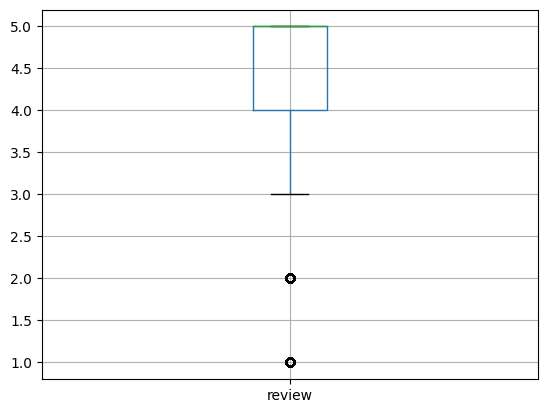

In [34]:
df_all_data_filtered_processed.boxplot(column=['review'])
plt.show()

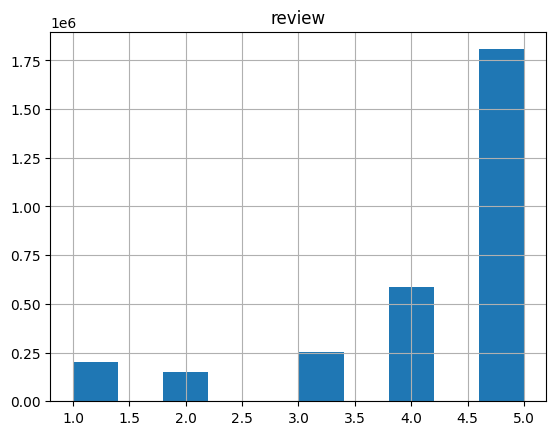

In [35]:
df_rating_processed.hist(column=['review'])
plt.show()

In [37]:
df_rating_processed[df_rating_processed['title']== 'The Hobbit']['review'].mean()

4.657131181038006

In [ ]:
df_rating_processed[df_rating_processed['Title']== 'The Hobbit']['review/score'].describe()

count    22023.000000
mean         4.657131
std          0.800452
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review/score, dtype: float64

In [ ]:

df_rating_processed[df_rating_processed['Title']== 'Atlas Shrugged']['review/score'].describe()

count    12513.000000
mean         4.028690
std          1.418635
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review/score, dtype: float64